# Graphic card thermal analysis

This example shows how to use pyAEDT to create a graphic card setup in
Icepak and postprocess the results.
The example file is an Icepak project with a model that is already created and
has materials assigned.

Keywords: **Icepak**, **boundary conditions**, **postprocessing**, **monitors**.

## Perform imports and define constants

Perform required imports.

In [1]:
import os
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.examples.downloads import download_icepak
import pandas as pd
from IPython.display import Image

Define constants.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Do not show the graphical user interface.

## Create temporary directory and download project

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")
project_temp_name = download_icepak(
    local_path=temp_folder.name
)

## Open project

Open the project without the GUI.

In [4]:
ipk = ansys.aedt.core.Icepak(
    project=project_temp_name,
    version=AEDT_VERSION,
    new_desktop=True,
    non_graphical=NG_MODE,
)

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpl0196pcd.ansys\Graphics_card.aedt.


PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_6a0788ef-d7b9-4924-990e-f7736aa90ea0.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpl0196pcd.ansys\Graphics_card.aedt correctly loaded. Elapsed time: 0m 10sec


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 8296.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Project Graphics_card has been opened.


PyAEDT INFO: Active Design set to IcepakDesign1


PyAEDT INFO: Active Design set to IcepakDesign1


PyAEDT INFO: Aedt Objects correctly read


## Plot model and rotate

Plot the model using the pyAEDT-PyVista integration and save the result to a file.
Rotate the model and plot the rotated model again.

In [5]:
plot1 = ipk.plot(
    show=False,
    output_file=os.path.join(temp_folder.name, "Graphics_card_1.jpg"),
    plot_air_objects=False,
)

ipk.modeler.rotate(ipk.modeler.object_names, "X")

plot2 = ipk.plot(
    show=False,
    output_file=os.path.join(temp_folder.name, "Graphics_card_2.jpg"),
    plot_air_objects=False,
)

PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

## Define boundary conditions

Create source blocks on the CPU and memories.

In [6]:
ipk.assign_solid_block(object_name="CPU", power_assignment="25W")
ipk.assign_solid_block(object_name=["MEMORY1", "MEMORY1_1"], power_assignment="5W")

PyAEDT INFO: Boundary Block Block_LJMLLP has been created.


PyAEDT INFO: Boundary Block Block_2LVJHJ has been created.


Block_2LVJHJ

The air region object handler is used to specify the inlet (fixed velocity condition) and outlet
(fixed pressure condition) at x_max and x_min.

In [7]:
region = ipk.modeler["Region"]
ipk.assign_pressure_free_opening(
    assignment=region.top_face_x.id, boundary_name="Outlet"
)
ipk.assign_velocity_free_opening(
    assignment=region.bottom_face_x.id,
    boundary_name="Inlet",
    velocity=["1m_per_sec", "0m_per_sec", "0m_per_sec"],
)

PyAEDT INFO: Boundary Opening Outlet has been created.


PyAEDT INFO: Boundary Opening Inlet has been created.


Inlet

## Assign mesh settings

### Assign mesh region
Assign a mesh region around the heat sink and CPU.

In [8]:
mesh_region = ipk.mesh.assign_mesh_region(assignment=["HEAT_SINK", "CPU"])

PyAEDT WARNING: Property Command is read-only.


PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


Print the available settings for the mesh region

In [9]:
mesh_region.settings

{'ProximitySizeFunction': True, 'OptimizePCBMesh': True, 'ComputeGap': True, 'MeshMethod': 'MesherHD', 'GeometryBasedMeshing': True, 'EnableTransition': False, 'Enable2DCutCell': False, 'StairStepMeshing': False, 'CurvatureSizeFunction': True, 'MeshRegionResolution': 5, 'FacetLevel': 3, 'Enforce2dot5DCutCell': False, 'EnforceCutCellMeshing': False}

Set the mesh region settings to manual and see newly available settings.

In [10]:
mesh_region.manual_settings = True
mesh_region.settings

{'MinElementsOnEdge': '2', 'MaxElementSizeZ': '0.03mm', 'ProximitySizeFunction': True, 'EnforeMLMType': '3D', 'EnableTransition': False, 'Enable2DCutCell': False, 'MaxLevels': '0', 'MinGapX': '1mm', 'StairStepMeshing': False, 'MaxSizeRatio': '2', 'CurvatureSizeFunction': True, 'MaxElementSizeY': '0.02mm', '2DMLMType': '2DMLM_None', 'MaxElementSizeX': '0.02mm', 'Enforce2dot5DCutCell': False, 'EnforceCutCellMeshing': False, 'OptimizePCBMesh': True, 'ComputeGap': True, 'MeshMethod': 'MesherHD', 'NoOGrids': False, 'MinElementsInGap': '3', 'BufferLayers': '0', 'UniformMeshParametersType': 'Average', 'MinGapY': '1mm', 'EnableMLM': True, 'MinGapZ': '1mm'}

Modify settings and update.

In [11]:
mesh_region.settings["MaxElementSizeX"] = "2mm"
mesh_region.settings["MaxElementSizeY"] = "2mm"
mesh_region.settings["MaxElementSizeZ"] = "2mm"
mesh_region.settings["EnableMLM"] = True
mesh_region.settings["MaxLevels"] = "2"
mesh_region.settings["MinElementsInGap"] = 4
mesh_region.update()

True

Modify the slack of the subregion around the objects.

In [12]:
subregion = mesh_region.assignment
subregion.positive_x_padding = "20mm"
subregion.positive_y_padding = "5mm"
subregion.positive_z_padding = "5mm"
subregion.negative_x_padding = "5mm"
subregion.negative_y_padding = "5mm"
subregion.negative_z_padding = "10mm"

PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


PyAEDT WARNING: Property Command is read-only.


## Assign monitors

Assign a temperature face monitor to the CPU face in contact with the heatsink.

In [13]:
cpu = ipk.modeler["CPU"]
m1 = ipk.monitor.assign_face_monitor(
    face_id=cpu.top_face_z.id,
    monitor_quantity="Temperature",
    monitor_name="TemperatureMonitor1",
)

Assign multiple speed point monitors downstream of the assembly.

In [14]:
speed_monitors = []
for x_pos in range(0, 10, 2):
    m = ipk.monitor.assign_point_monitor(
        point_position=[f"{x_pos}mm", "40mm", "15mm"], monitor_quantity="Speed"
    )
    speed_monitors.append(m)

## Solve project

Create a setup, modify solver settings, and run the simulation.

In [15]:
setup1 = ipk.create_setup()
setup1.props["Flow Regime"] = "Turbulent"
setup1.props["Convergence Criteria - Max Iterations"] = 5
setup1.props["Linear Solver Type - Pressure"] = "flex"
setup1.props["Linear Solver Type - Temperature"] = "flex"
ipk.save_project()
ipk.analyze(setup=setup1.name, cores=NUM_CORES, tasks=NUM_CORES)

PyAEDT INFO: Project Graphics_card Saved correctly


PyAEDT INFO: Project Graphics_card Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Icepak correctly changed.


PyAEDT INFO: Solving design setup Setup


PyAEDT INFO: Design setup Setup solved correctly in 0.0h 2.0m 41.0s


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/Icepak correctly changed.


True

## Postprocess

### Perform quantitative postprocessing

Get the point monitor data. A dictionary is returned with ``'Min'``, ``'Max'``, and ``'Mean'`` keys.

In [16]:
temperature_data = ipk.post.evaluate_monitor_quantity(
    monitor=m1, quantity="Temperature"
)
temperature_data

{'Min': '60.667', 'Max': '60.667', 'Mean': '60.667', 'Stdev': '0', 'Unit': 'C'}

It is also possible to get the data as a Pandas dataframe for advanced postprocessing.

In [17]:
speed_fs = ipk.post.create_field_summary()
for m_name in speed_monitors:
    speed_fs.add_calculation(
        entity="Monitor", geometry="Volume", geometry_name=m_name, quantity="Speed"
    )
speed_data = speed_fs.get_field_summary_data(pandas_output=True)

All the data is now in a dataframe, making it easy to visualize and manipulate.

In [18]:
speed_data.head()

Entity Type Geometry Type          Entity    Quantity     Side Normal Mesh  \
0     Monitor        Volume  Monitor_ZGJARX  Speed[m/s]  Default         All   
1     Monitor        Volume  Monitor_OND614  Speed[m/s]  Default         All   
2     Monitor        Volume  Monitor_PBE374  Speed[m/s]  Default         All   
3     Monitor        Volume  Monitor_S0GA7U  Speed[m/s]  Default         All   
4     Monitor        Volume  Monitor_B8R2T2  Speed[m/s]  Default         All   

        Min       Max      Mean  Stdev Area/Volume Variation  
0  0.268278  0.268278  0.268278      0       0 m^3            
1  0.282501  0.282501  0.282501      0       0 m^3            
2  0.348166  0.348166  0.348166      0       0 m^3            
3  0.356274  0.356274  0.356274      0       0 m^3            
4  0.364556  0.364556  0.364556      0       0 m^3

The ``speed_data`` dataframe contains data from monitors, so it can be expanded with information
of their position.

In [19]:
for i in range(3):
    direction = ["X", "Y", "Z"][i]
    speed_data["Position" + direction] = [
        ipk.monitor.all_monitors[entity].location[i] for entity in speed_data["Entity"]
    ]

Plot the velocity profile at different X positions

<Axes: xlabel='x [mm]', ylabel='Speed[m/s]'>

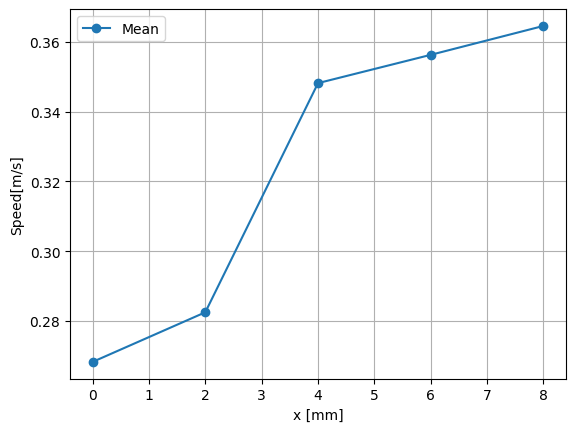

In [20]:
speed_data.plot(
    x="PositionX",
    y="Mean",
    kind="line",
    marker="o",
    ylabel=speed_data.at[0, "Quantity"],
    xlabel=f"x [{ipk.modeler.model_units}]",
    grid=True,
)

Extract temperature data at those same locations (so the ``speed_monitors`` list is used).

In [21]:
temperature_fs = ipk.post.create_field_summary()
for m_name in speed_monitors:
    temperature_fs.add_calculation(
        entity="Monitor",
        geometry="Volume",
        geometry_name=m_name,
        quantity="Temperature",
    )
temperature_fs = temperature_fs.get_field_summary_data(pandas_output=True)
temperature_fs.head()

Entity Type Geometry Type          Entity        Quantity     Side Normal  \
0     Monitor        Volume  Monitor_ZGJARX  Temperature[C]  Default          
1     Monitor        Volume  Monitor_OND614  Temperature[C]  Default          
2     Monitor        Volume  Monitor_PBE374  Temperature[C]  Default          
3     Monitor        Volume  Monitor_S0GA7U  Temperature[C]  Default          
4     Monitor        Volume  Monitor_B8R2T2  Temperature[C]  Default          

  Mesh      Min      Max     Mean  Stdev Area/Volume Variation  
0  All  57.4154  57.4154  57.4154      0       0 m^3            
1  All  53.4731  53.4731  53.4731      0       0 m^3            
2  All  47.6639  47.6639  47.6639      0       0 m^3            
3  All  46.9586  46.9586  46.9586      0       0 m^3            
4  All  46.2532  46.2532  46.2532      0       0 m^3

The two dataframes can be merged using the `pd.merge()` function. With the merge, suffixes are
added to the column names to differentiate between the columns from each original dataframe.

In [22]:
merged_df = pd.merge(
    temperature_fs, speed_data, on="Entity", suffixes=("_temperature", "_speed")
)
merged_df.head()

Entity Type_temperature Geometry Type_temperature          Entity  \
0                 Monitor                    Volume  Monitor_ZGJARX   
1                 Monitor                    Volume  Monitor_OND614   
2                 Monitor                    Volume  Monitor_PBE374   
3                 Monitor                    Volume  Monitor_S0GA7U   
4                 Monitor                    Volume  Monitor_B8R2T2   

  Quantity_temperature Side_temperature Normal_temperature Mesh_temperature  \
0       Temperature[C]          Default                                 All   
1       Temperature[C]          Default                                 All   
2       Temperature[C]          Default                                 All   
3       Temperature[C]          Default                                 All   
4       Temperature[C]          Default                                 All   

   Min_temperature  Max_temperature  Mean_temperature  ...  Mesh_speed  \
0          57.4154          57.4154           57.4154  ...         All   
1          53.4731          53.4731           53.4731  ...         All   
2          47.6639          47.6639           47.6639  ...         All   
3          46.9586          46.9586           46.9586  ...         All   
4          46.2532          46.2532           46.2532  ...         All   

  Min_speed Max_speed Mean_speed Stdev_speed Area/Volume_speed  \
0  0.268278  0.268278   0.268278           0             0 m^3   
1  0.282501  0.282501   0.282501           0             0 m^3   
2  0.348166  0.348166   0.348166           0             0 m^3   
3  0.356274  0.356274   0.356274           0             0 m^3   
4  0.364556  0.364556   0.364556           0             0 m^3   

  Variation_speed PositionX PositionY  PositionZ  
0                       0.0      40.0       15.0  
1                       2.0      40.0       15.0  
2                       4.0      40.0       15.0  
3                       6.0      40.0       15.0  
4                       8.0      40.0       15.0  

[5 rows x 28 columns]

The column names are renamed based on the ``Quantity`` column of the original dataframes.
Finally, only the ``'Entity'``, ``'Mean_temperature'``, and ``'Mean_speed'`` columns are selected and
assigned to the merged dataframe.

In [23]:
temperature_quantity = temperature_fs["Quantity"].iloc[0]
velocity_quantity = speed_data["Quantity"].iloc[0]
merged_df.rename(
    columns={"Mean_temperature": temperature_quantity, "Mean_speed": velocity_quantity},
    inplace=True,
)
merged_df = merged_df[
    [
        "Entity",
        temperature_quantity,
        velocity_quantity,
        "PositionX",
        "PositionY",
        "PositionZ",
    ]
]
merged_df.head()

Entity  Temperature[C]  Speed[m/s]  PositionX  PositionY  PositionZ
0  Monitor_ZGJARX         57.4154    0.268278        0.0       40.0       15.0
1  Monitor_OND614         53.4731    0.282501        2.0       40.0       15.0
2  Monitor_PBE374         47.6639    0.348166        4.0       40.0       15.0
3  Monitor_S0GA7U         46.9586    0.356274        6.0       40.0       15.0
4  Monitor_B8R2T2         46.2532    0.364556        8.0       40.0       15.0

Compute the correlation coefficient between velocity and temperature from the merged dataframe
and plot a scatter plot to visualize their relationship.

Text(0.5, 1.0, 'Correlation between Temperature and Velocity: -0.98')

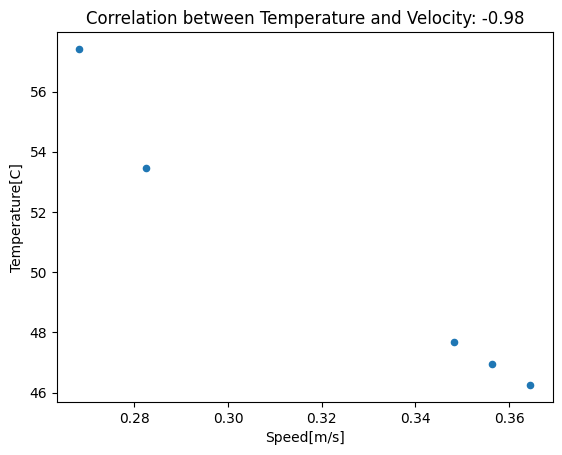

In [24]:
correlation = merged_df[velocity_quantity].corr(merged_df[temperature_quantity])
ax = merged_df.plot.scatter(x=velocity_quantity, y=temperature_quantity)
ax.set_xlabel(velocity_quantity)
ax.set_ylabel(temperature_quantity)
ax.set_title(f"Correlation between Temperature and Velocity: {correlation:.2f}")

The further away from the assembly, the faster and colder the air due to mixing.
Despite being extremely simple, this example demonstrates the potential of importing field
summary data into Pandas.

### Perform qualitative Postprocessing
Create a temperature plot on main components and export it to a PNG file.

PyAEDT INFO: Active Design set to IcepakDesign1


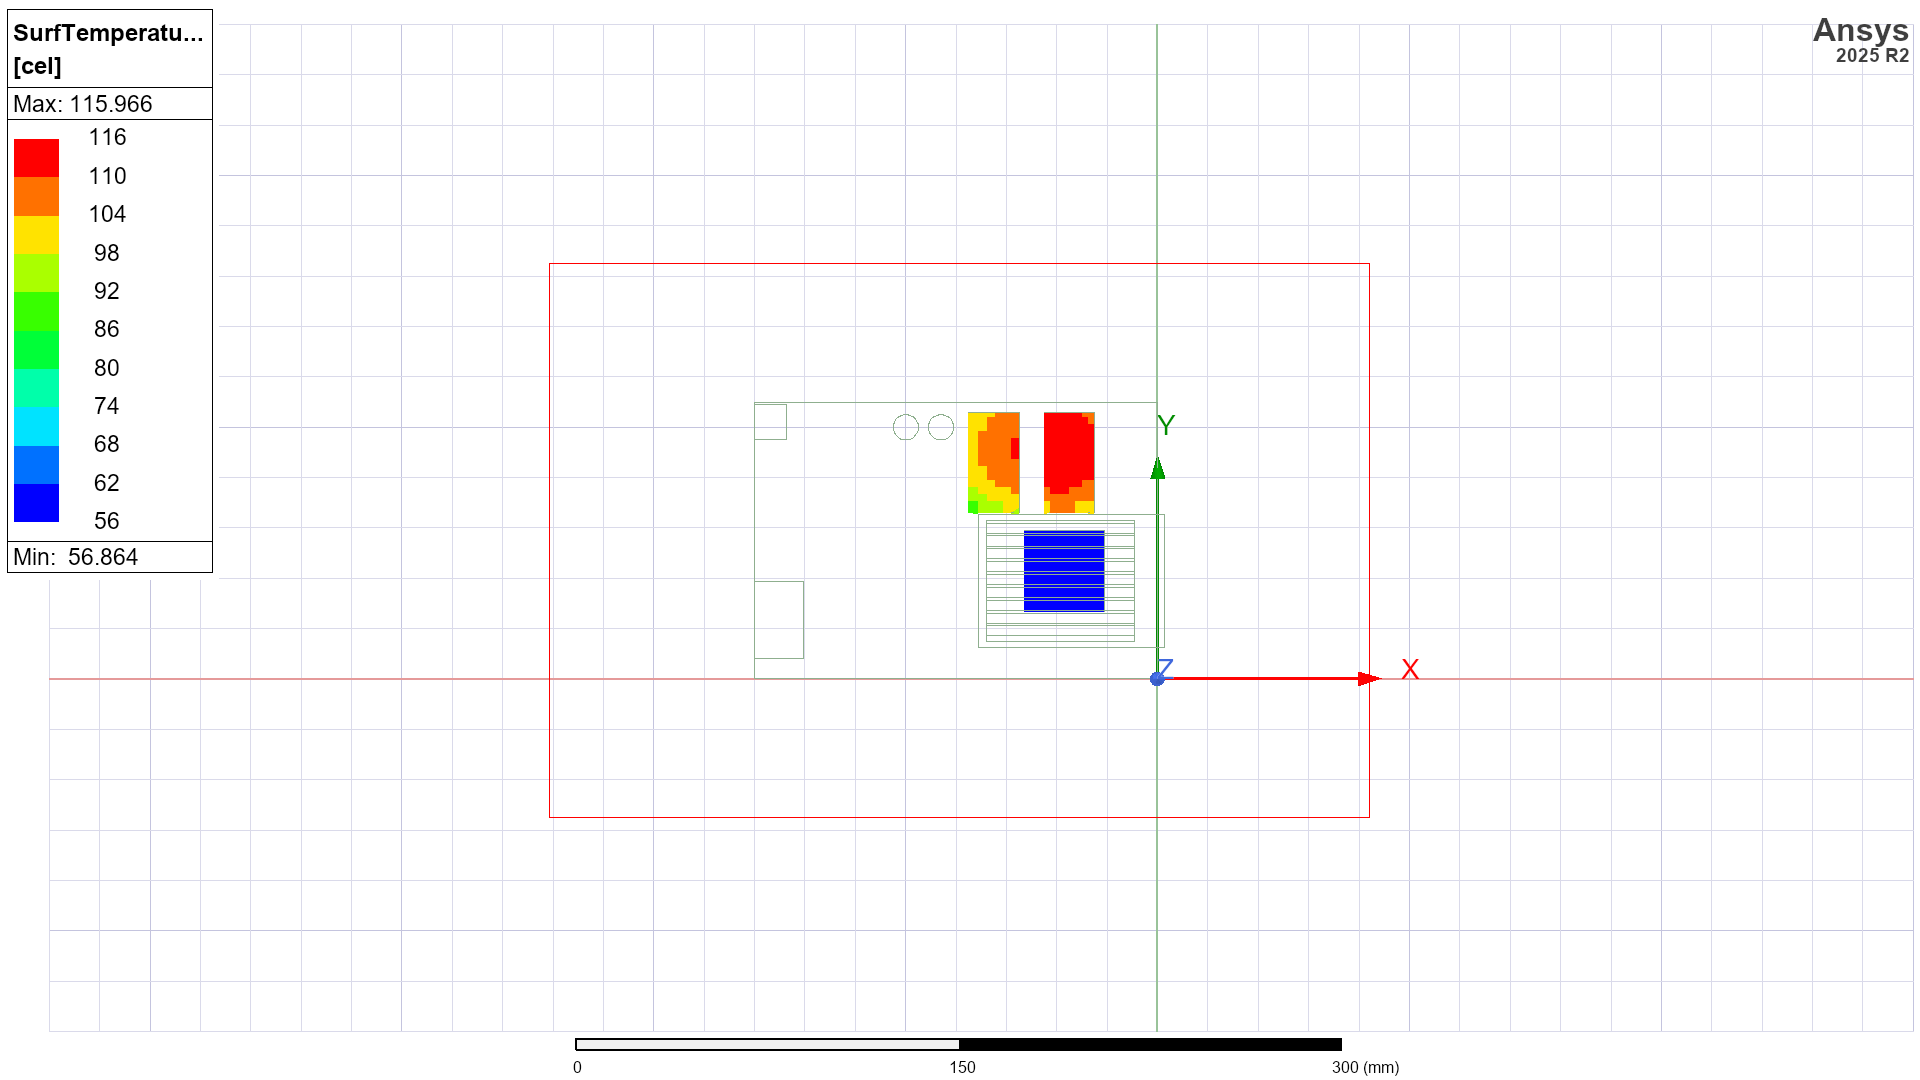

In [25]:
surflist = [i.id for i in ipk.modeler["CPU"].faces]
surflist += [i.id for i in ipk.modeler["MEMORY1"].faces]
surflist += [i.id for i in ipk.modeler["MEMORY1_1"].faces]
plot3 = ipk.post.create_fieldplot_surface(
    assignment=surflist, quantity="SurfTemperature"
)
path = plot3.export_image(
    full_path=os.path.join(temp_folder.name, "temperature.png"),
    orientation="top",
    show_region=False,
)
Image(filename=path)  # Display the image

Use PyVista to display the temperature map.

In [26]:
plot4 = ipk.post.plot_field(
    quantity="Temperature",
    assignment=[
        "SERIAL_PORT",
        "MEMORY1",
        "MEMORY1_1",
        "CAPACITOR",
        "CAPACITOR_1",
        "KB",
        "HEAT_SINK",
        "CPU",
        "ALPHA_MAIN_PCB",
    ],
    plot_cad_objs=False,
    show=False,
    export_path=temp_folder.name,
)

PyAEDT INFO: Active Design set to IcepakDesign1


EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

## Release AEDT

In [27]:
ipk.save_project()
ipk.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project Graphics_card Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [28]:
temp_folder.cleanup()